# ☞ **Scarping raw data from website**

In [ ]:
from web_scraping import whisky_data_scraping

scraper = whisky_data_scraping()

# Scrape Data
data = scraper.scrape_whisky(number_of_pages=2)

data.to_csv('whisky_data.csv')

# ☞ **Generate Random Data**

In [ ]:
import pandas as pd
import numpy as np
import names
from faker import Faker
faker = Faker()
import pandasql as ps
import random
import time
from datetime import datetime

def sql(query):
    return ps.sqldf(query)

## Gennerate Product Id Columns

In [ ]:
# Loading the csv file from web_sraping into a dataframe
product_df = pd.read_csv('/retail_store_de/flows/whisky_data.csv',index_col='Unnamed: 0')

# Changing the Alcohol price to float
product_df['Alcohol_Price'] = product_df.Alcohol_Price.str.replace(',','').astype('float')

product_df['Alcohol_Capcity'] = product_df.Alcohol_Capcity.str.replace('cl','').astype('float')

# Generate a column of unique product ids
product_id = np.random.default_rng(seed= 0).choice(len(product_df.Product_Name), len(product_df.Product_Name), replace = False)

assert len(set(product_id)) == len(product_id)

assert len(pd.Series(product_id).unique()) == len(product_id)

product_df['product_id'] = product_id

product_df.head(10)

---
## Generate Employees data

In [ ]:
# Generating 100 Employee Unique id's
employee_id = np.random.default_rng().choice(4000, 100, replace = False)

# Verify that there are as many ids as there are employees
assert len(set(employee_id)) == 100

# Verify that the new ids are unique
assert len(pd.Series(employee_id).unique()) == len(employee_id)

# Generating 100 Employee Data
employee_first_name = []
employee_last_name = []
employee_full_name = []
employee_email = []
employee_city = []
departments = ['Sales', 'Finance', 'Marketing', 'BI']
employee_department = []

# iterate through the employees and generate random data
for i in range(len(employee_id)):
    employee_first_name.append(names.get_first_name())
    employee_last_name.append(names.get_last_name())
    employee_full_name.append(employee_first_name[i] + ' ' + employee_last_name[i])
    employee_email.append(employee_first_name[i] + employee_last_name[i][0].lower() + '@gmail.com')
    employee_city.append(faker.city())
    employee_department.append(np.random.choice(departments, 1)[0])


# Create an employee dataframe
employee_df = pd.DataFrame(employee_id, columns = ['employee_id'])
employee_df['first_name'] = employee_first_name
employee_df['last_name'] = employee_last_name
employee_df['full_name'] = employee_full_name
employee_df['email'] = employee_email
employee_df['city'] = employee_city
employee_df['department'] = employee_department

employee_df.tail(10)

---
## Generate Customer Data

In [ ]:

# Generating 1000 Customer Unique id's
customer_id = np.random.default_rng(seed= 0).choice(999999, 1000, replace = False)

# Verify that there are as many ids as there are customers
assert len(set(customer_id)) == 1000

# Verify that the new ids are unique
assert len(pd.Series(customer_id).unique()) == len(customer_id)


# Generating 1000 Customers Data
customer_first_name = []
customer_last_name = []
customer_full_name = []
customer_email = []
customer_last_four_digits = []
customer_country = []
customer_country_code = []
customer_street = []
customer_credit_card_company = []


# iterate through the customers and generate random data
for i in range(len(customer_id)): 
    customer_first_name.append(names.get_first_name())
    customer_last_name.append(names.get_last_name())
    customer_full_name.append(customer_first_name[i] + ' ' + customer_last_name[i])
    customer_email.append(customer_first_name[i] + customer_last_name[i][0].lower() + '@gmail.com')
    customer_last_four_digits.append(np.random.randint(low = 1000, high = 9999, size = 1)[0])
    customer_country.append(faker.country())
    customer_country_code.append(customer_country[i][0:3].upper())
    customer_street.append(faker.street_address())
    customer_credit_card_company.append(faker.credit_card_provider())


# Create a customer dataframe
customer_df = pd.DataFrame(customer_id, columns = ['customer_id'])
customer_df['first_name'] = customer_first_name
customer_df['last_name'] = customer_last_name
customer_df['full_name'] = customer_full_name
customer_df['email'] = customer_email
customer_df['country'] = customer_country
customer_df['country_code'] = customer_country_code
customer_df['street'] = customer_street
customer_df['credit_provider'] = customer_credit_card_company
customer_df['four_digits'] = customer_last_four_digits


# Sample Output
customer_df.tail(10)

---
### Generate Payments Data

In [ ]:

# Generating random days in the range of 1990 to 2020
date_range = pd.date_range(start = "1990-01-01", end = "2020-12-31", freq="D",)


# Generating Unique payment id's
payment_id = np.random.default_rng(seed=0).choice(999999, len(date_range), replace = False)

# Verify that there are as many ids as there are dates
assert len(set(payment_id)) == len(date_range)

# Verify that the new ids are unique
assert len(pd.Series(payment_id).unique()) == len(payment_id)


# Generating payments Data
customer_id_payments = []
employee_id_payments = []
product_id_payments = []
dates = []


# iterate through the payments and generate random data
for i in range(len(payment_id)):
    dates.append(datetime.strftime(random.choice(date_range), format='%Y-%m-%d'))
    customer_id_payments.append(random.choice(customer_id))
    employee_id_payments.append(random.choice(employee_id))
    product_id_payments.append(random.choice(product_id))


# Create a payments dataframe
payment_df = pd.DataFrame(payment_id, columns = ['payment_id'])
payment_df['date'] = sorted(dates)
payment_df['customer_id'] = customer_id_payments
payment_df['employee_id'] = employee_id_payments
payment_df['product_id'] = product_id_payments


# Adding the Alcohol_price column to the table
query = '''
select p1.*, p2.Alcohol_Price as price
from payment_df p1
inner join product_df p2
on p1.product_id = p2.product_id
'''

payment_df = sql(query)


# Sample Output
payment_df.tail(10)

# ☞☞ **Normalizing Tables**

- I already have generated all the de-normalized tables, next my job is to normalize them to meet the demands for the third normalized form(3NF).

    Normalizing the Customer Table ✔
- Right now, each row is unique, and each cell contains exactly one value, so this table already meets the requirements for the first normal form(1NF).
- The requirement for the second normal form is to separate groups of values that apply to multiple rows.
- I’ll create three separate tables from this table to meet the requirements for 2NF.
    - Customers 
    - countries
    - customer credit card

        1. First Table — countries

In [ ]:
# Creating a new table called countries
unique_countries = customer_df.country.unique()
countries_df = pd.DataFrame(unique_countries, columns = ['Country'])
countries_df['Country_Code'] = countries_df.Country.str[0:3]
countries_df['Country_Code'] = countries_df.Country_Code.str.upper()
countries_df['country_id'] = [*range(0,len(countries_df))]

# Extracting the country_id column from customers
query = '''
select countries_df.country_id
from customer_df 
join countries_df
on 
    customer_df.country_code = countries_df.country_code and
    customer_df.country = countries_df.country
'''

country_ids = sql(query)


# Connecting countries to customers by adding the foregin key: country_id
customer_df['country_id'] = country_ids

# Dropping the column country and country_code
customer_df = customer_df.drop(['country','country_code'],axis=1)



        2. Second Table — Customer_cc

In [ ]:
# Creating a new table called customer_cc
unique_cc_providers = customer_df.credit_provider.unique()
customer_cc_df = pd.DataFrame(unique_cc_providers, columns = ['credit_provider'])
customer_cc_df['credit_provider_id'] = [*range(0,len(customer_cc_df))]

# Extracting the credit_provider_id column from customers
query = '''
select customer_cc_df.credit_provider_id
from customer_df 
join customer_cc_df
on 
    customer_df.credit_provider = customer_cc_df.credit_provider
'''

credit_provider_id = sql(query)

# Connecting customer_cc to customers by adding the foregin key: credit_provider_id 
customer_df['credit_provider_id'] = credit_provider_id


# Dropping the column credit_provider
customer_df = customer_df.drop(['credit_provider'],axis=1)

- Now let’s check if the customer’s table meets the third normal form.
- The requirement for 3NF is that each column is dependent only on the primary key. In this case, the primary key is customer_id.
- To understand if a column is dependent only on the primary key, I need to answer two questions:
    - *Given a primary key, can I tell the value of that column?*      
    <span style="color: lightskyblue">If the answer is yes, then I move to the second question</span>
    - *Given any other column, can I tell the value of that column?*    
    <span style="color: lightskyblue">If the answer is no, I can safely say that this column is dependent only on the primary key.</span>
- Eg:
    - Given a customer id, can I know the name of that customer ?    
    👉 *Yes. Knowing the customer id will pinpoint the customer’s name.*
    - Given any other column, can I know the name of the customers ?     
    👉 *No. By looking at the last name, country, or any other column, I cannot pinpoint the customer’s name. Multiple people may have the same last name and the same country.*
    
    

    Normalizing the Employees Table ✔
- Each row is unique, and each cell contains exactly one value, so this table is already in the first normal form(1NF).
- Does this table have values that apply to multiple rows?   (for checking NF2)
    - Yes. Department is a repeated value.
    - There are only four departments in the organization, this column is causing data redundancy. <span style="color: lightskyblue"> Let’s divide this table into two tables: employees table and department table. </span>

        Departments table

In [ ]:
# Extracting the departments from the employees table
departments = pd.Series(employee_df.department.unique()).to_list()

# Generating unique department ids
department_id = [*range(0, len(departments))]

# Creating a table called departments
department_df = pd.DataFrame(department_id, columns=['department_id'])
department_df['department'] = departments


# Extracting the country_id column from customers
query = '''
select department_df.department_id
from employee_df 
join department_df
on 
    employee_df.department = department_df.department
'''

department_ids = sql(query)

# Connecting countries to customers by adding the foregin key: country_id
employee_df['department_id'] = department_ids


# Dropping the column department
employee_df = employee_df.drop('department',axis = 1)

- Let's check requirements for 3NF:

In [ ]:
employee_df.head(10)

- Each column is dependent only on the primary key, which is employee_id, so this table meets the 3NF.

# ☞ **Loading data into central RDBMS**

    ✔ Connecting Python To MySQL

In [ ]:
# Connecting Python to MySQL
import pymysql
import pandas as pd

connection = pymysql.connect(host ='localhost',port=int(3306),user='root',passwd='liqh_root2805')

# Creating a cursor object
cursor = connection.cursor()

    ✔ Creating a new Schema

In [ ]:
# Create a new schema called whiskey_shop
cursor.execute('''
drop schema if exists whiskey_shop;
''')

cursor.execute('''
create schema whiskey_shop;
''')

# Use the new schema
cursor.execute('''
use whiskey_shop;
''')

    ✔ Generating empty tables

In [ ]:
# Countries
cursor.execute('''
DROP TABLE IF EXISTS countries;
''')

cursor.execute('''
CREATE TABLE countries (
    Country VARCHAR(100) NOT NULL,
    Country_Code VARCHAR(100) NOT NULL,
    country_id INT PRIMARY KEY
    );
''')

In [ ]:
# Customer_cc
cursor.execute('''
DROP TABLE IF EXISTS customer_cc;
''')

cursor.execute('''
CREATE TABLE customer_cc (
    credit_provider VARCHAR(100) NOT NULL,
    credit_provider_id INT PRIMARY KEY
    );
''')

In [ ]:
# Products
cursor.execute('''
DROP TABLE IF EXISTS products;
''')

cursor.execute('''
CREATE TABLE products (
    Product_Name VARCHAR(100) NOT NULL,
    Alcohol_Percent FLOAT NOT NULL,
    Alcohol_Capcity FLOAT NOT NULL,
    Alcohol_Price FLOAT NOT NULL,
    product_id int NOT NULL PRIMARY KEY
    );
''')

In [ ]:
# Departments
cursor.execute('''
DROP TABLE IF EXISTS departments;
''')

cursor.execute('''
CREATE TABLE departments (
    department_id INT PRIMARY KEY,
    department VARCHAR(100) NOT NULL
    );
''')

In [ ]:
# Customers
cursor.execute('''
DROP TABLE IF EXISTS customers;
''')

cursor.execute('''
CREATE TABLE customers (
    customer_id INT PRIMARY KEY NOT NULL,
    first_name VARCHAR(100) NOT NULL,
    last_name VARCHAR(100) NOT NULL,
    full_name VARCHAR(100) NOT NULL,
    email VARCHAR(100) NOT NULL,
    street VARCHAR(100) NOT NULL,
    four_digits INT NOT NULL,
    country_id INT NOT NULL,
    credit_provider_id INT NOT NULL,
    
    FOREIGN KEY (country_id) REFERENCES countries (country_id),
    FOREIGN KEY (credit_provider_id) REFERENCES customer_cc (credit_provider_id)
);
''')

In [ ]:
# Employees
cursor.execute('''
DROP TABLE IF EXISTS employees;
''')

cursor.execute('''
CREATE TABLE employees (
    employee_id INT PRIMARY KEY NOT NULL,
    first_name VARCHAR(100) NOT NULL,
    last_name VARCHAR(100) NOT NULL,
    full_name VARCHAR(100) NOT NULL,
    email VARCHAR(100) NOT NULL,
    city VARCHAR(100) NOT NULL,
    department_id INT NOT NULL,
    
    FOREIGN KEY (department_id) REFERENCES departments(department_id)
);
''')

In [ ]:
# Payments
cursor.execute('''
DROP TABLE IF EXISTS payments;
''')

cursor.execute('''
CREATE TABLE payments (
    payment_id INT NOT NULL PRIMARY KEY,
    date DATE NOT NULL,
    customer_id INT NOT NULL,
    employee_id INT NOT NULL,
    product_id INT NOT NULL,
    price FLOAT NOT NULL,

    FOREIGN KEY (product_id) REFERENCES products(product_id),
    FOREIGN KEY (employee_id) REFERENCES employees(employee_id),
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
    );
''')


    The ERD diagram of the schema:

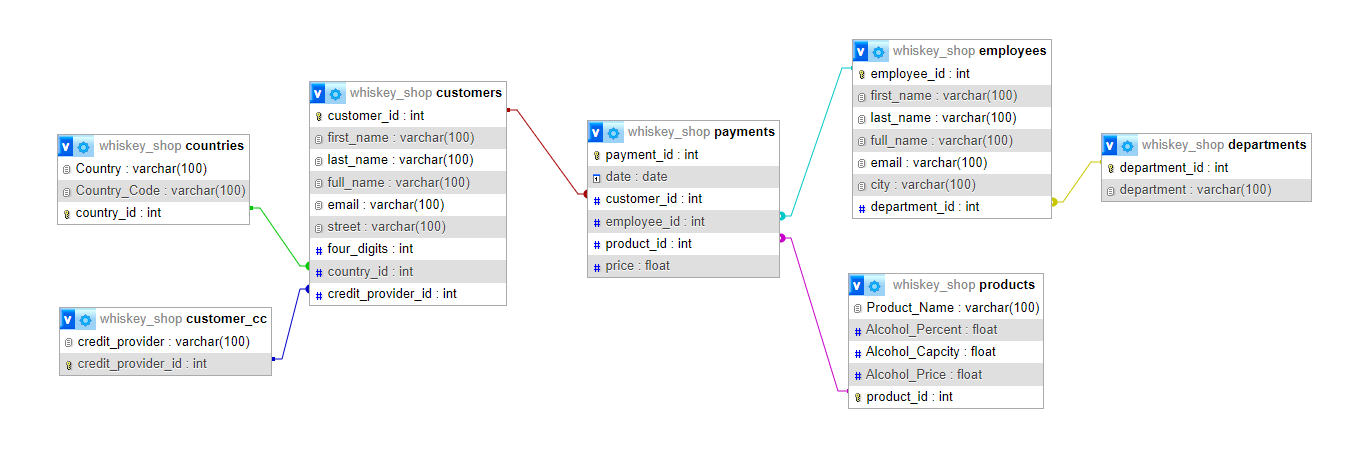

    ✔ Populating the tables

        ✍Countries

In [ ]:
# Convert the Dataframe into a list of arrays
records = countries_df.to_records(index=False)

# Convert the list of arrays into a tuple of tuples
result = tuple(records)

for data in range(0,len(result)):
    
    # Create a new record
    query = "insert into countries (country, country_code, country_id) values {}".format(result[data])
    
    # Execute the query
    cursor.execute(query)
    
    
# Commit the transaction
connection.commit()

        ✍Customer_cc

In [ ]:
# Convert the Dataframe into a list of arrays
records = customer_cc_df.to_records(index=False)

# Convert the list of arrays into a tuple of tuples
result = tuple(records)

for data in range(0,len(result)):
    
    # Create a new record
    query = "insert into customer_cc (credit_provider, credit_provider_id) values {}".format(result[data])
    
    # Execute the query
    cursor.execute(query)
    
    
# Commit the transaction
connection.commit()

        ✍Products

In [ ]:
# Convert the Dataframe into a list of arrays
records = product_df.to_records(index=False)

# Convert the list of arrays into a tuple of tuples
result = tuple(records)

for data in range(0,len(result)):
    
    # Create a new record
    query = "insert into products (Product_Name, Alcohol_Percent, Alcohol_Capcity, Alcohol_Price,product_id) values {}".format(result[data])
    
    # Execute the query
    cursor.execute(query)
    
    
# Commit the transaction
connection.commit()

        ✍Departments

In [ ]:
# Convert the Dataframe into a list of arrays
records = department_df.to_records(index=False)

# Convert the list of arrays into a tuple of tuples
result = tuple(records)

for data in range(0,len(result)):
    
    # Create a new record
    query = "insert into departments (department_id, department) values {}".format(result[data])
    
    # Execute the query
    cursor.execute(query)
    
    
# Commit the transaction
connection.commit()

        ✍Customers

In [ ]:

# Convert the Dataframe into a list of arrays
records = customer_df.to_records(index=False)

# Convert the list of arrays into a tuple of tuples
result = tuple(records)

for data in range(0,len(result)):
    
    # Create a new record
    query = "insert into customers (customer_id, first_name, last_name, full_name, email, street, four_digits, country_id, credit_provider_id) values {}".format(result[data])
    
    # Execute the query
    cursor.execute(query)
    
    
# Commit the transaction
connection.commit()

        ✍Employees

In [ ]:
# Convert the Dataframe into a list of arrays
records = employee_df.to_records(index=False)

# Convert the list of arrays into a tuple of tuples
result = tuple(records)

for data in range(0,len(result)):
    
    # Create a new record
    query = "insert into employees (employee_id, first_name, last_name, full_name,email,city, department_id) values {}".format(result[data])
    
    # Execute the query
    cursor.execute(query)
    
    
# Commit the transaction
connection.commit()

        ✍Payments

In [ ]:
# Convert the Dataframe into a list of arrays
records = payment_df.to_records(index=False)

# Convert the list of arrays into a tuple of tuples
result = tuple(records)

for data in range(0,len(result)):
    
    # Create a new record
    query = "insert into payments (payment_id, date,customer_id,employee_id,product_id,price) values {}".format(result[data])
    
    # Execute the query
    cursor.execute(query)
    
    
# Commit the transaction
connection.commit()